In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [654]:
data = pd.read_csv("car_price_assignment.csv")

In [655]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### EDA

In [656]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [657]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [658]:
data.groupby("CarName").count().head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,,,,,,,,,,,,,,,,,,,,,
Nissan versa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero Quadrifoglio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero giulia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero stelvio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
audi 100 ls,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [659]:
car_company = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"car_company",car_company)

In [660]:
data.head()

,car_ID,symboling,CarName,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [661]:
def correct_name(a,b):
    data['car_company'].replace(a,b,inplace=True)

In [662]:
correct_name('maxda','mazda')
correct_name('Nissan','nissan')
correct_name('porsche','porcshce')
correct_name('toyouta','toyota')
correct_name('vokswagen','volkswagen')
correct_name('vw','volkswagen')

In [663]:
data.groupby("car_company").count().head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_company,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [664]:
data.head()

,car_ID,symboling,CarName,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


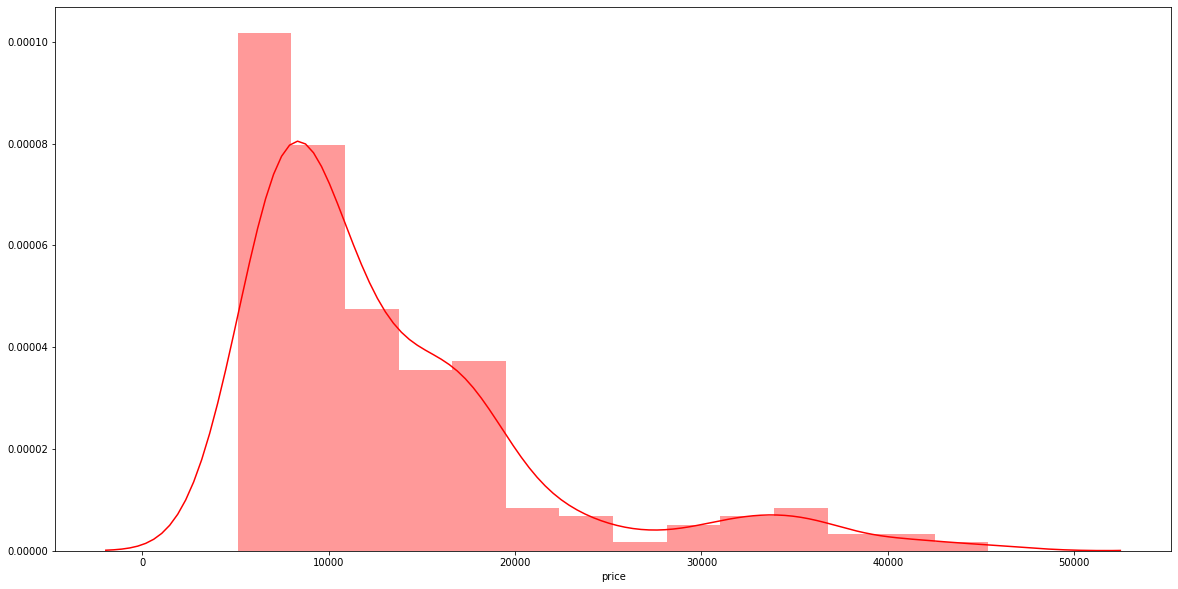

In [711]:
sns.distplot(data['price'],color='Red')

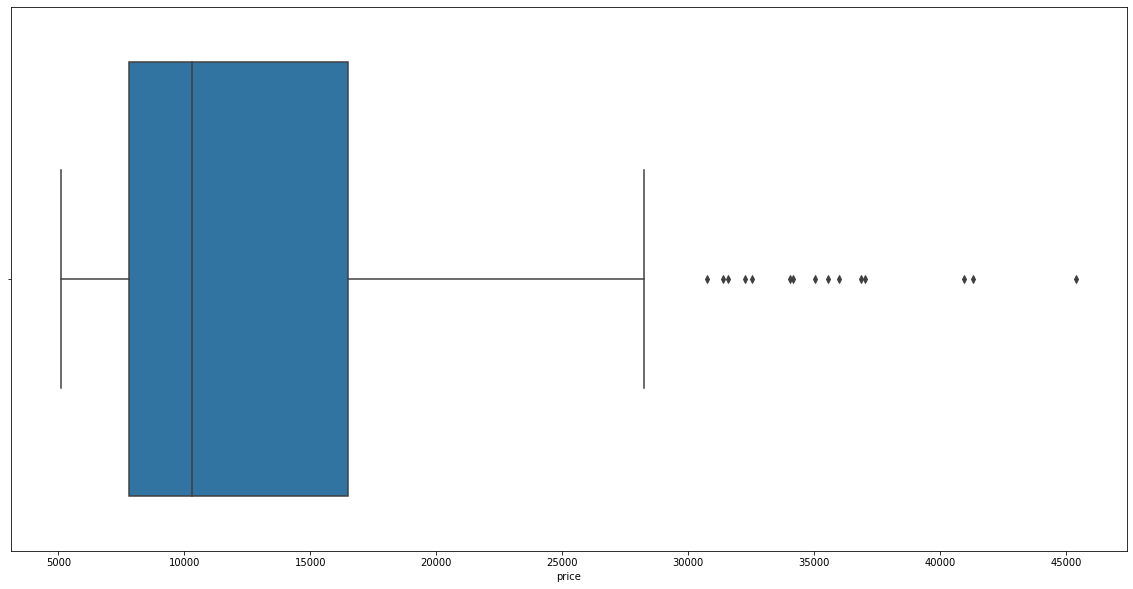

In [666]:
sns.boxplot(data['price'])

In [667]:
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

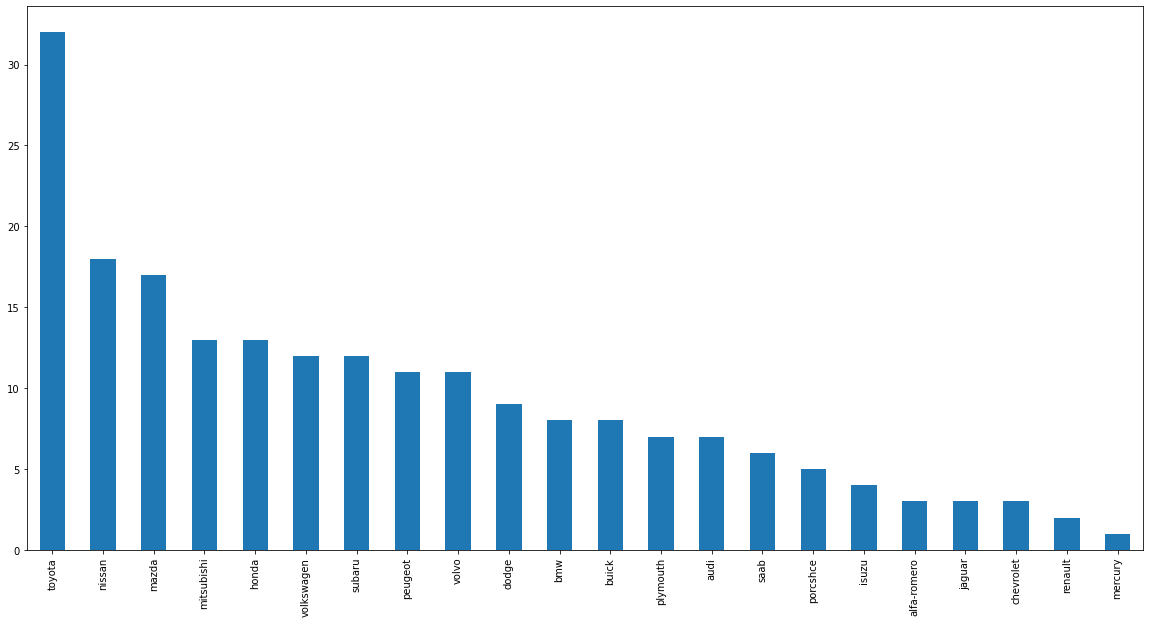

In [668]:
data.car_company.value_counts().plot('bar')

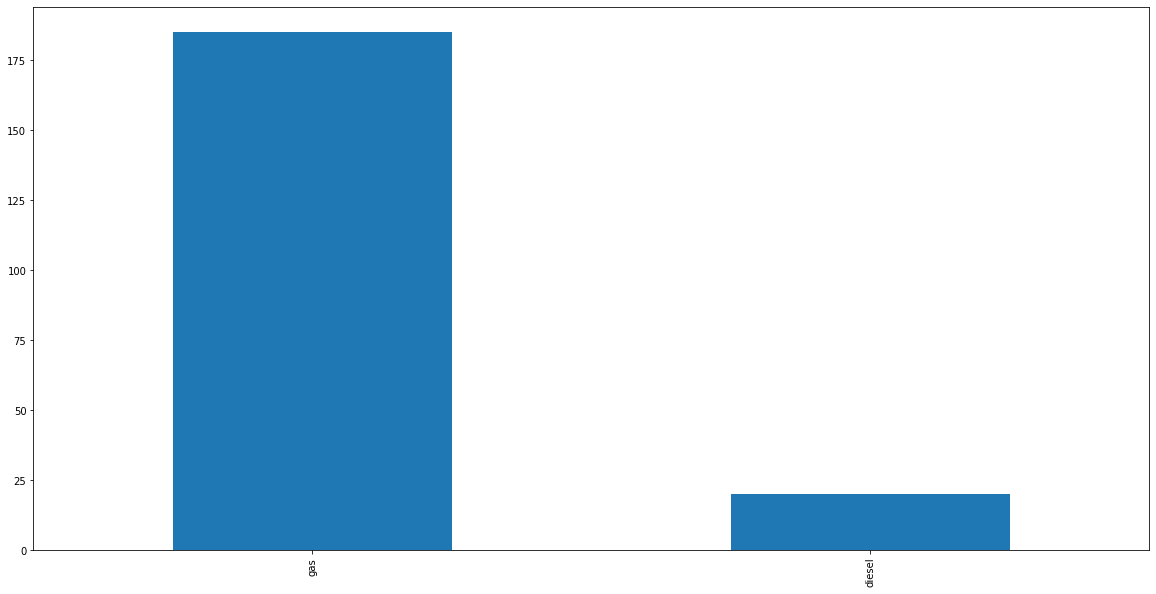

In [669]:
data.fueltype.value_counts().plot('bar')

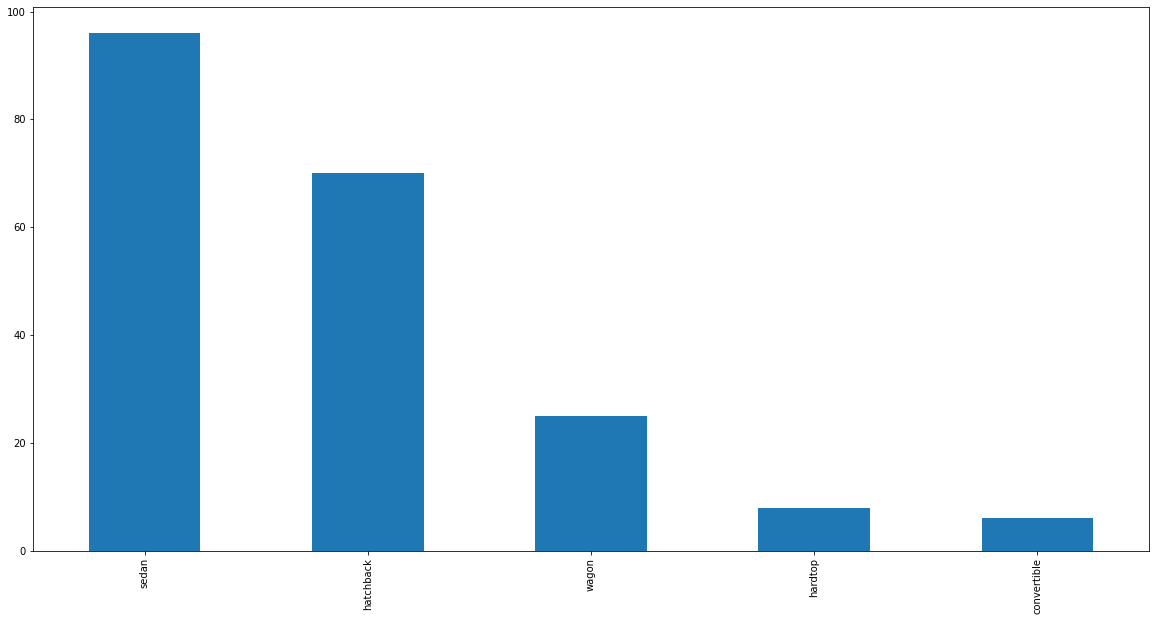

In [670]:
data.carbody.value_counts().plot('bar')

In [671]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'car_company', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [672]:
data1 = data[['car_ID', 'symboling', 'CarName', 'car_company', 'fueltype','aspiration', 'doornumber','price']]
data2 = data[['carbody', 'drivewheel', 'enginelocation','wheelbase', 'carlength', 'carwidth', 'carheight','price']]
data3 = data[['curbweight','enginetype', 'cylindernumber', 'enginesize', 'fuelsystem','boreratio','price']]
data4 = data[['stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg', 'price']]

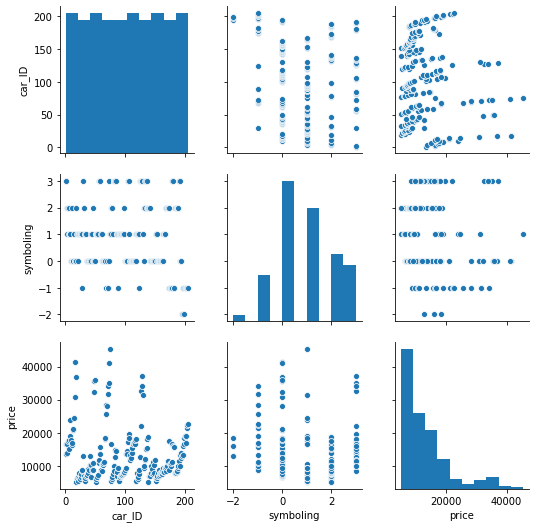

In [673]:
sns.pairplot(data1)

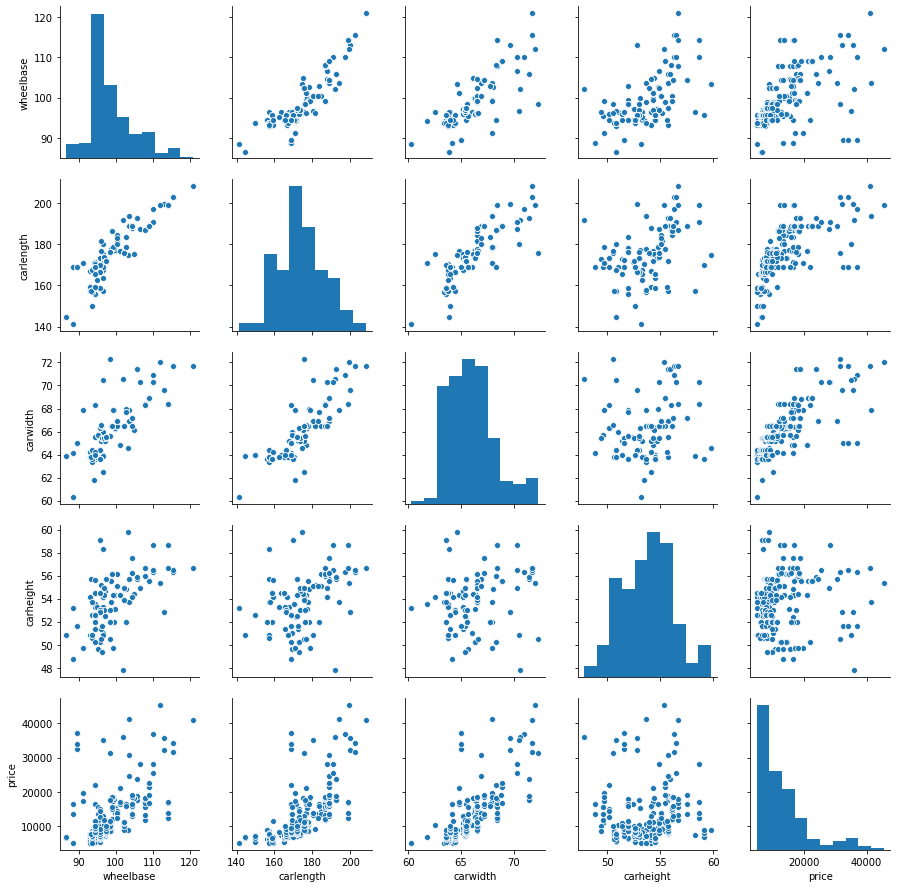

In [674]:
sns.pairplot(data2)

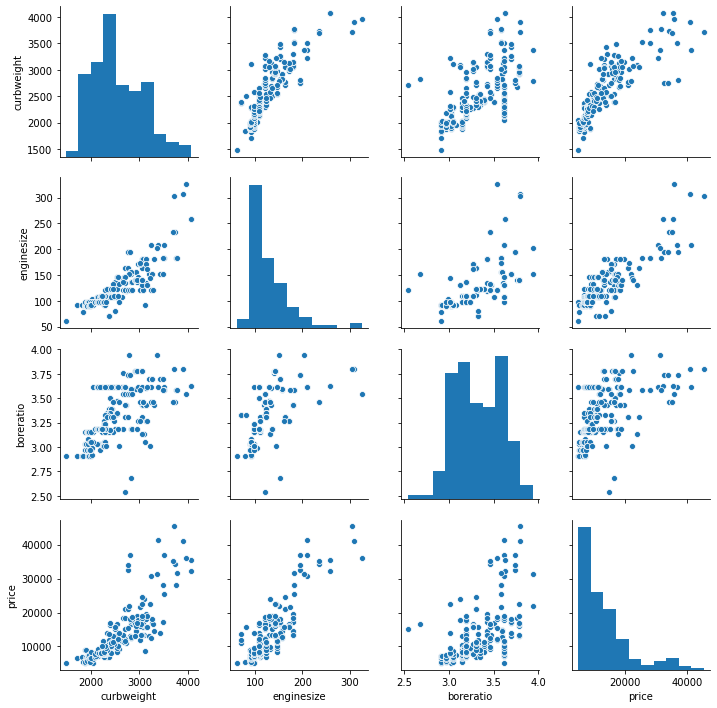

In [675]:
sns.pairplot(data3)

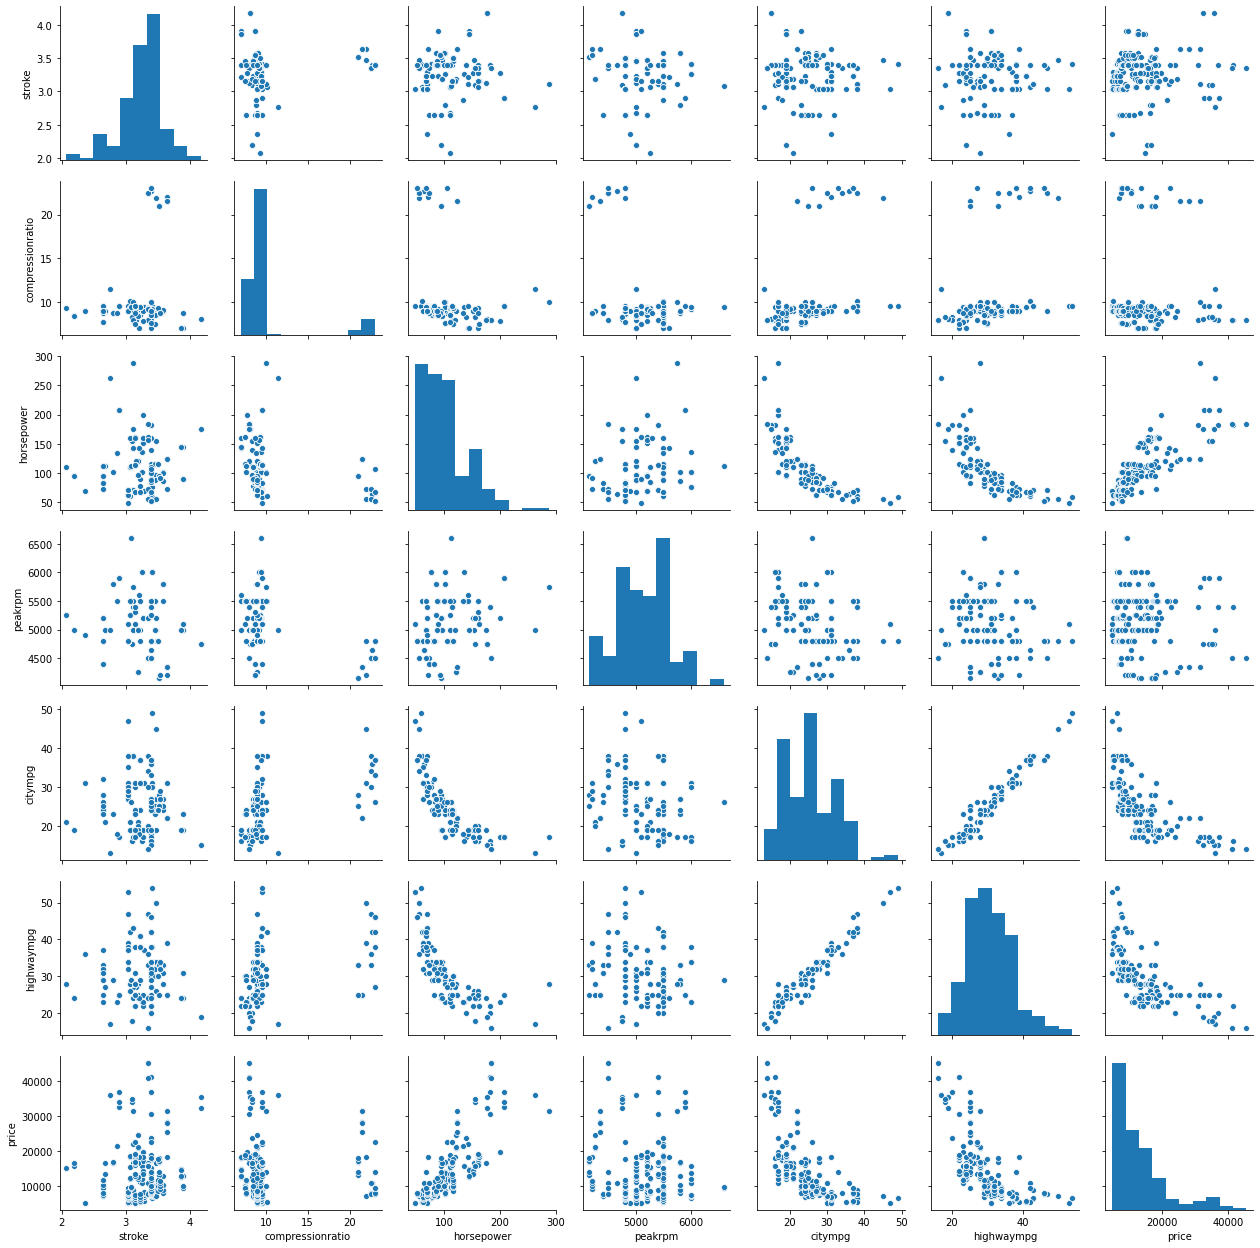

In [676]:
sns.pairplot(data4)

In [677]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
car_company         205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower  

In [678]:
data.head()

,car_ID,symboling,CarName,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [679]:
data.groupby('doornumber').count()

,car_ID,symboling,CarName,car_company,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
doornumber,,,,,,,,,,,,,,,,,,,,,
four,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
two,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [680]:
data['fueltype'].replace({"diesel": 0, "gas": 1}, inplace=True)
data['aspiration'].replace({"std": 1, "turbo": 0}, inplace=True)
data['doornumber'].replace({"two": 2, "four": 4}, inplace=True)

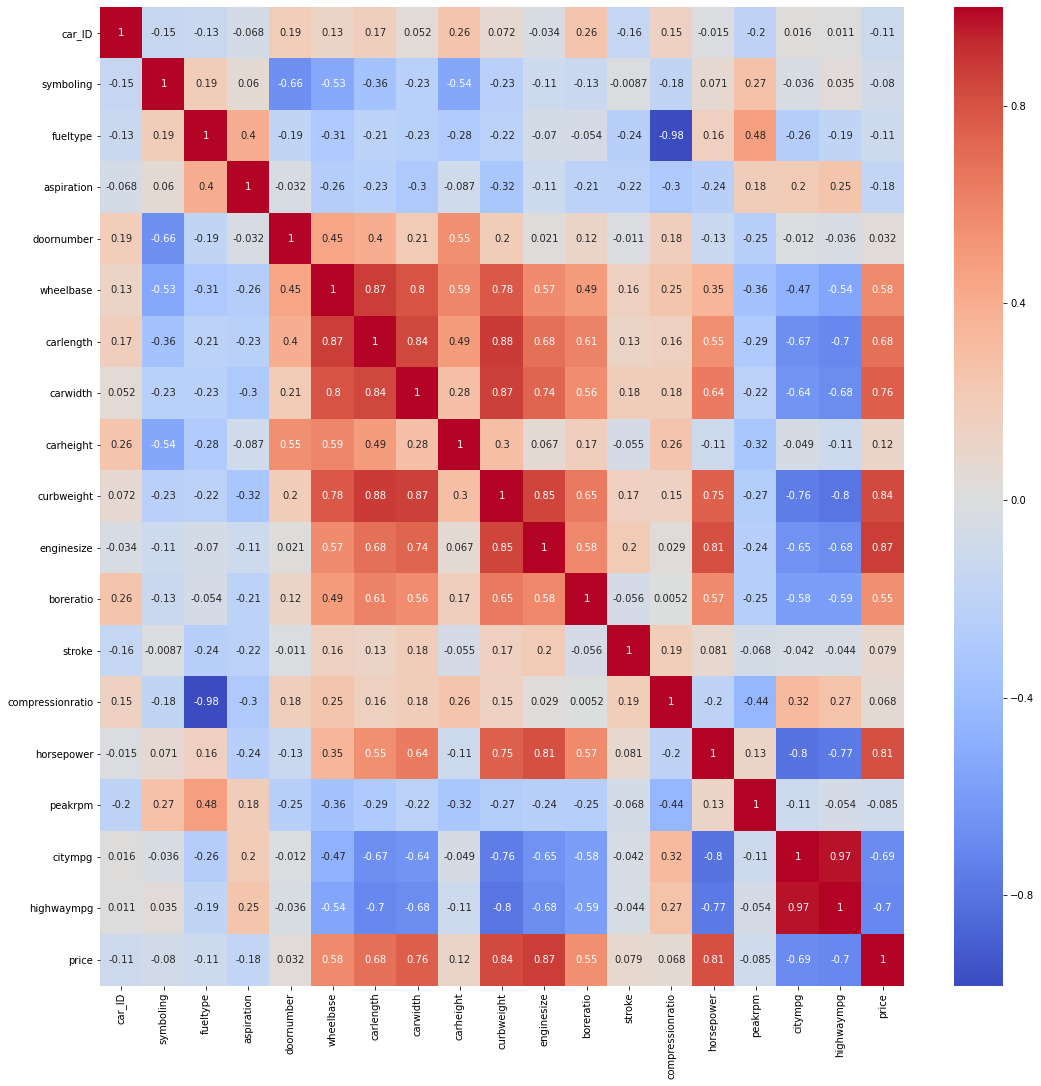

In [681]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [682]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'car_company', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [683]:
data['bor_stroke'] = data['boreratio']*data['stroke']*data['compressionratio']
data['mpg'] = data['citympg'] + data['highwaympg']
data['torque'] = (data['horsepower']*5252)/data['peakrpm']

In [684]:
data.head()

,car_ID,symboling,CarName,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bor_stroke,mpg,torque
0,1,3,alfa-romero giulia,alfa-romero,1,1,2,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,13495.0,83.6964,48,116.594400
1,2,3,alfa-romero stelvio,alfa-romero,1,1,2,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,16500.0,83.6964,48,116.594400
2,3,1,alfa-romero Quadrifoglio,alfa-romero,1,1,2,hatchback,rwd,front,...,3.47,9.0,154,5000,19,26,16500.0,83.6964,45,161.761600
3,4,2,audi 100 ls,audi,1,1,4,sedan,fwd,front,...,3.40,10.0,102,5500,24,30,13950.0,108.4600,54,97.400727
4,5,2,audi 100ls,audi,1,1,4,sedan,4wd,front,...,3.40,8.0,115,5500,18,22,17450.0,86.7680,40,109.814545


In [685]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'car_company', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'bor_stroke', 'mpg', 'torque'],
      dtype='object')

In [686]:
reg_features = ['wheelbase','carlength','carwidth','horsepower','curbweight','enginesize','citympg','highwaympg','torque']
reg_target = ['price']

In [687]:
X = data[reg_features]
y = data[reg_target]

### Linear Regression 

In [688]:
from sklearn.model_selection import train_test_split

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [690]:
from sklearn.linear_model import LinearRegression

In [691]:
lm = LinearRegression()

In [692]:
lm.fit(X_train,y_train)

LinearRegression()

In [693]:
print(lm.intercept_)

[-56033.86933116]


In [694]:
predictions = lm.predict(X_test)

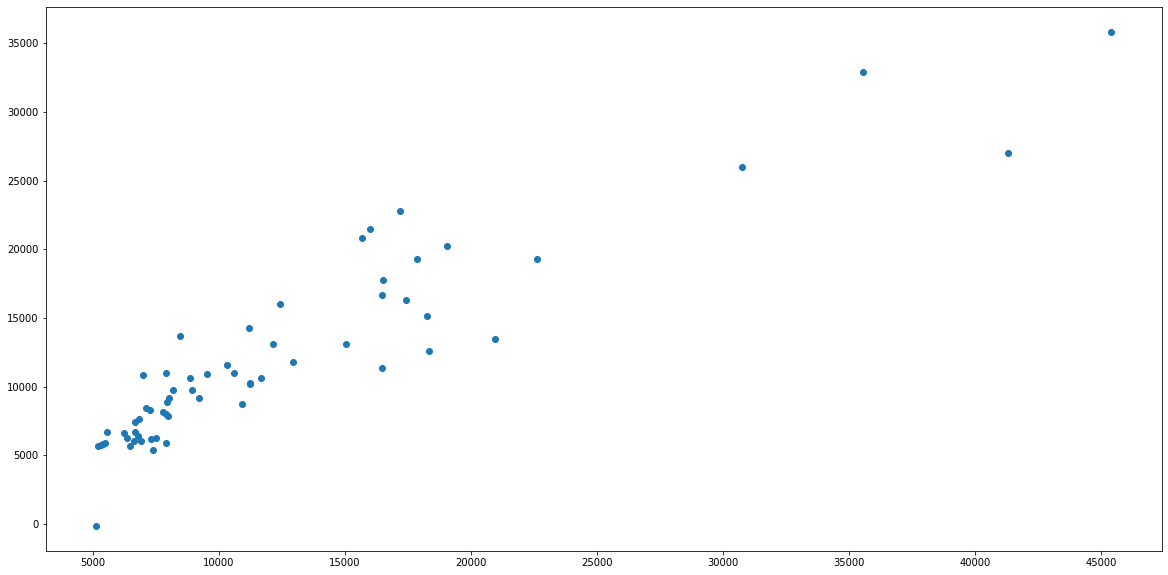

In [695]:
plt.scatter(y_test,predictions)

In [696]:
from sklearn import metrics

In [697]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2206.9825577241186
MSE: 11312019.177629402
RMSE: 3363.3345325181976


### Polynomial Regression

In [698]:
from sklearn.preprocessing import PolynomialFeatures 
X = data[reg_features]
y = data[reg_target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [699]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
X_poly_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 

LinearRegression()

In [700]:
y_train_predicted = lin2.predict(X_poly)
y_test_predict = lin2.predict(poly.fit_transform(X_test))

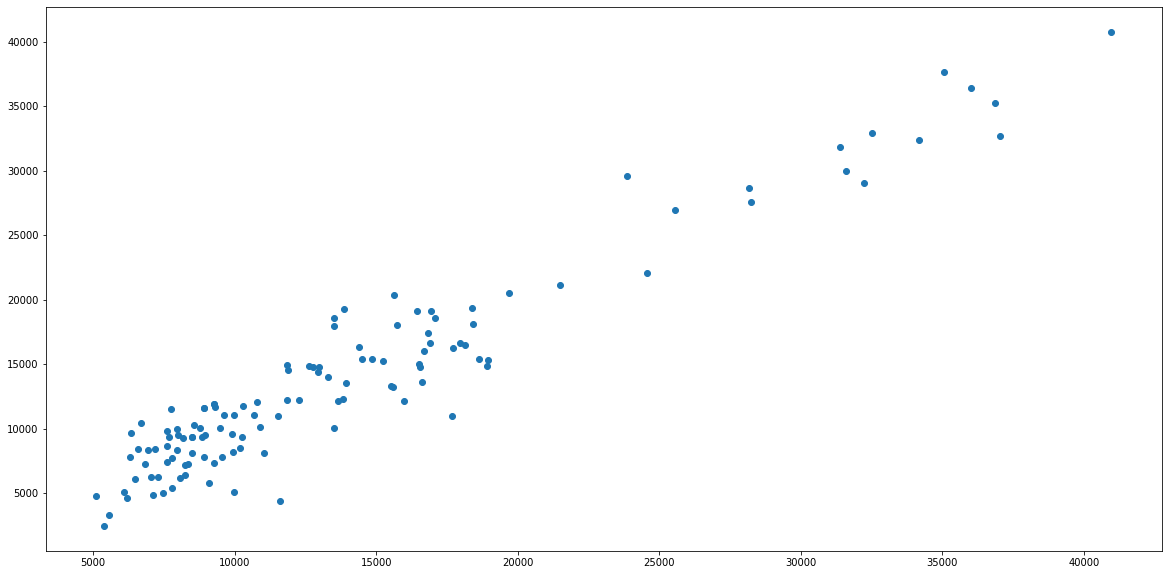

In [701]:
plt.scatter(y_train,y_train_predicted)

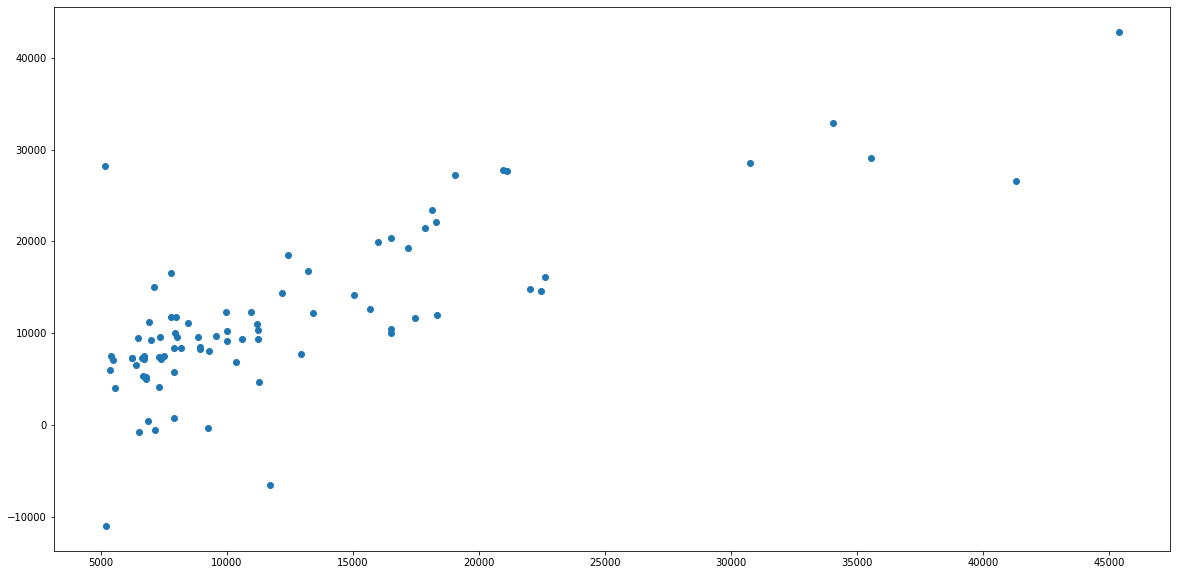

In [702]:
plt.scatter(y_test,y_test_predict)

In [703]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))

-------Test Data--------
MAE: 3910.464482654106
MSE: 32575217.499864347
RMSE: 5707.470324045877

-------Train Data--------
MAE: 1837.0728324331888
MSE: 5356939.380461257
RMSE: 2314.506293026929


### Decision Tree Regressor

In [704]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 3)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=3)

In [705]:
y_pred = regressor.predict(X_test)

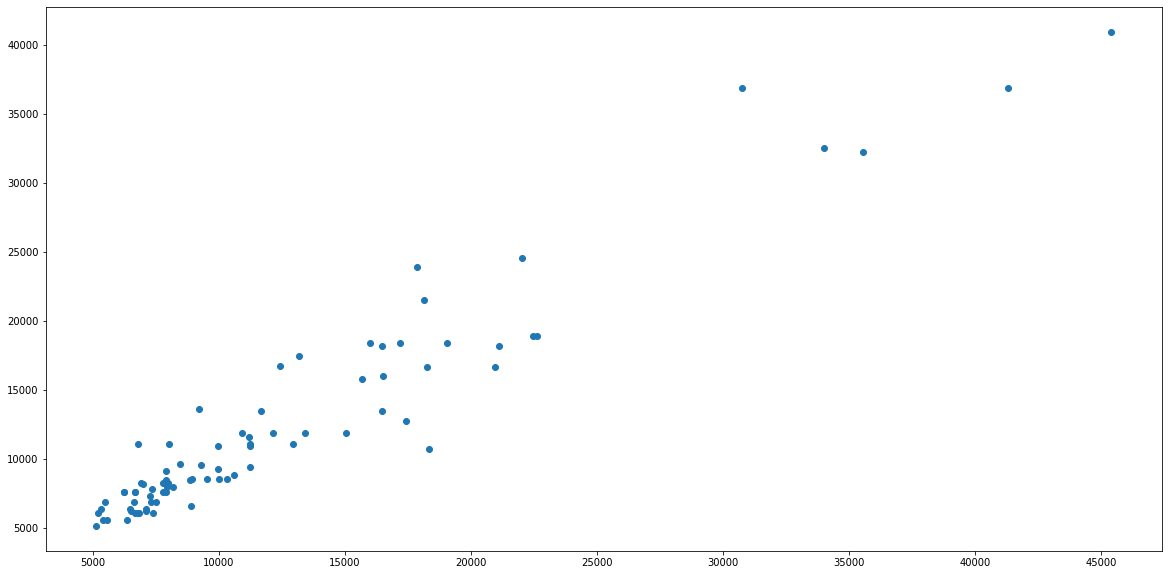

In [706]:
plt.scatter(y_test,y_pred)

In [707]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

-------Test Data--------
MAE: 1661.0406463414631
MSE: 5431977.249193768
RMSE: 2330.660260354084


### Conclusion

The **Linear Regression** model has a RMSE value of - **3363**

The **Polynomial Regression** model has a RMSE value of - **2314**

The **Decision Tree Regression** model has a RMSE value of - **2330**, with a random state of 2.

Decision Tree regression demonstrate the lowest value of RMSE, hence it's the best model to predict car price for this data.